In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

2025-01-03 08:42:39.744150: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 08:42:39.762050: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 08:42:39.762065: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 08:42:39.762076: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 08:42:39.765423: I tensorflow/core/platform/cpu_feature_g

1. 모든 단어 사용

In [2]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = reuters.load_data(
    num_words=None, test_split=0.2)

2. 빈도수 상위 5000개의 단어만 사용

In [3]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = reuters.load_data(
    num_words=5000, test_split=0.2)

3. 직접 단어 개수를 설정해서 사용 (3000개 사용)

In [4]:
(x_train_3, y_train_3), (x_test_3, y_test_3) = reuters.load_data(
    num_words=3000, test_split=0.2)

In [5]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [6]:
index_to_word = {index+3 : word for word, index in word_index.items() }

In [7]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [8]:
print(' '.join([index_to_word[index] for index in x_train_1[0]]))
print(' '.join([index_to_word[index] for index in x_train_2[0]]))
print(' '.join([index_to_word[index] for index in x_train_3[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax 

In [9]:
decoded = []
for i in range(len(x_train_1)):
    t = ' '.join([index_to_word[index] for index in x_train_1[i]])
    decoded.append(t)
x_train_1 = decoded

decoded = []
for i in range(len(x_train_2)):
    t = ' '.join([index_to_word[index] for index in x_train_2[i]])
    decoded.append(t)
x_train_2 = decoded

decoded = []
for i in range(len(x_train_3)):
    t = ' '.join([index_to_word[index] for index in x_train_3[i]])
    decoded.append(t)
x_train_3 = decoded

In [10]:
decoded = []
for i in range(len(x_test_1)):
    t = ' '.join([index_to_word[index] for index in x_test_1[i]])
    decoded.append(t)
x_test_1 = decoded

decoded = []
for i in range(len(x_test_2)):
    t = ' '.join([index_to_word[index] for index in x_test_2[i]])
    decoded.append(t)
x_test_2 = decoded

decoded = []
for i in range(len(x_test_2)):
    t = ' '.join([index_to_word[index] for index in x_test_3[i]])
    decoded.append(t)
x_test_3 = decoded

In [11]:
x_train_1[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [12]:
x_train_2[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [13]:
x_train_3[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> <unk> de <unk> sa lt <unk> <unk> and lt <unk> overseas corp of chicago have each taken 50 pct <unk> in <unk> company sa <unk> factors <unk> de <unk> said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 <unk> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one spl

In [14]:
x_test_1[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [15]:
x_test_2[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

In [16]:
x_test_3[:5]

['<sos> the great atlantic and pacific <unk> co said its three year <unk> mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the c

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
dtmvector_1 = CountVectorizer()
x_train_1_dtm = dtmvector_1.fit_transform(x_train_1)
print(x_train_1_dtm.shape)

(8982, 26506)


In [19]:
dtmvector_2 = CountVectorizer()
x_train_2_dtm = dtmvector_2.fit_transform(x_train_2)
print(x_train_2_dtm.shape)

(8982, 4867)


In [20]:
dtmvector_3 = CountVectorizer()
x_train_3_dtm = dtmvector_3.fit_transform(x_train_3)
print(x_train_3_dtm.shape)

(8982, 2919)


In [21]:
tfidf_transformer_1 = TfidfTransformer()
tfidfv_1 = tfidf_transformer_1.fit_transform(x_train_1_dtm)
print(tfidfv_1.shape)

(8982, 26506)


In [22]:
tfidf_transformer_2 = TfidfTransformer()
tfidfv_2 = tfidf_transformer_2.fit_transform(x_train_2_dtm)
print(tfidfv_2.shape)

(8982, 4867)


In [23]:
tfidf_transformer_3 = TfidfTransformer()
tfidfv_3 = tfidf_transformer_3.fit_transform(x_train_3_dtm)
print(tfidfv_3.shape)

(8982, 2919)


In [24]:
from sklearn.naive_bayes import MultinomialNB  # 다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score  # 정확도 계산

1. Navie Bayes

In [25]:
model_1 = MultinomialNB()
model_1.fit(tfidfv_1, y_train_1)
model_2 = MultinomialNB()
model_2.fit(tfidfv_2, y_train_2)
model_3 = MultinomialNB()
model_3.fit(tfidfv_3, y_train_3)

MultinomialNB()

In [26]:
x_test_1_dtm = dtmvector_1.transform(x_test_1)  # 테스트 데이터를 DTM으로 변환
tfidfv_1_test = tfidf_transformer_1.transform(x_test_1_dtm)  # DTM을 TF-IDF 행렬로 변환

predicted = model_1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교

x_test_2_dtm = dtmvector_2.transform(x_test_2)  # 테스트 데이터를 DTM으로 변환
tfidfv_2_test = tfidf_transformer_2.transform(x_test_2_dtm)  # DTM을 TF-IDF 행렬로 변환

predicted = model_2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교

x_test_3_dtm = dtmvector_3.transform(x_test_3)  # 테스트 데이터를 DTM으로 변환
tfidfv_3_test = tfidf_transformer_3.transform(x_test_3_dtm)  # DTM을 TF-IDF 행렬로 변환

predicted = model_3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.5997328584149599


2번 정확도: 0.6731967943009796
3번 정확도: 0.6874443455031166


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
print(classification_report(y_test_1, model_1.predict(tfidfv_1_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

In [29]:
print(classification_report(
    y_test_2, model_2.predict(tfidfv_2_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

In [30]:
print(classification_report(
    y_test_3, model_3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.49      0.82      0.61       105
           2       0.00      0.00      0.00        20
           3       0.88      0.88      0.88       813
           4       0.64      0.95      0.76       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.48      0.65        25
          10       1.00      0.10      0.18        30
          11       0.45      0.76      0.56        83
          12       0.00      0.00      0.00        13
          13       0.70      0.19      0.30        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.56      0.76      0.64        99
          17       0.00    

In [31]:
def graph_confusion_matrix(model, x_test, y_test):  # , classes_name):
  # , index=classes_name, columns=classes_name)
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))
  fig = plt.figure(figsize=(12, 12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(
      heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(
      heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

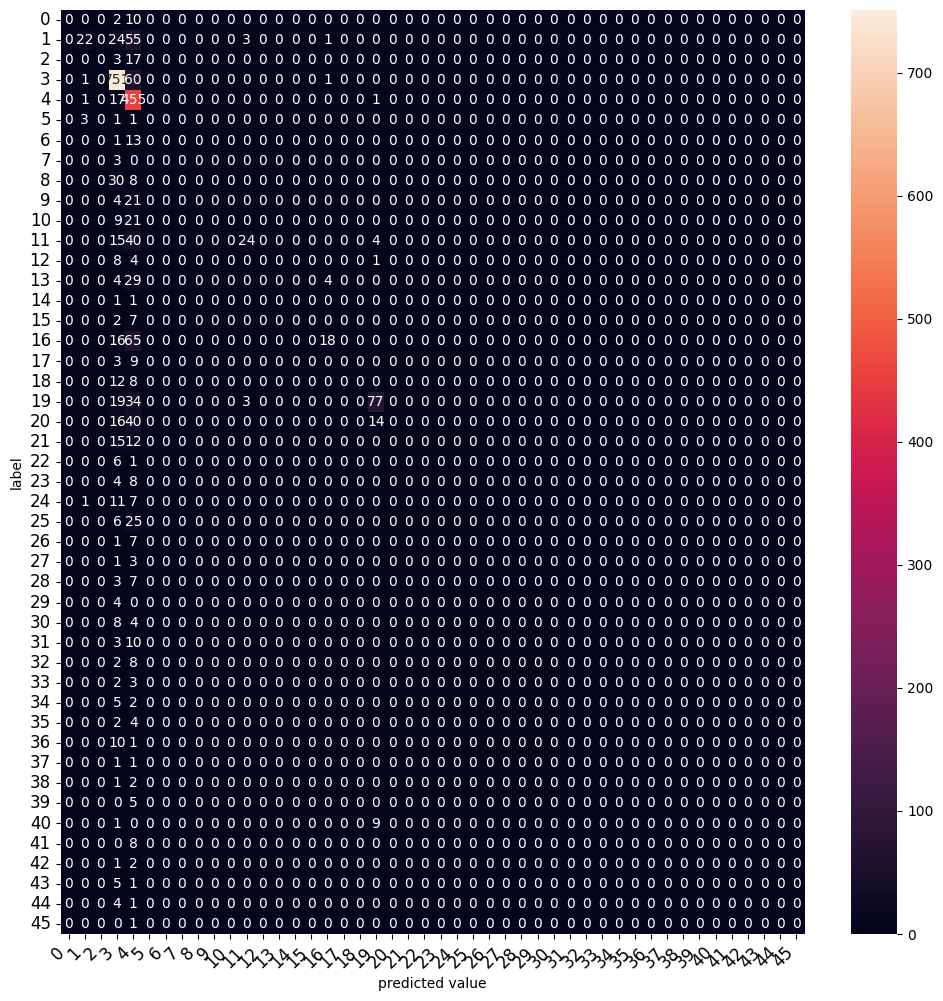

In [32]:
graph_confusion_matrix(model_1, tfidfv_1_test, y_test_1)

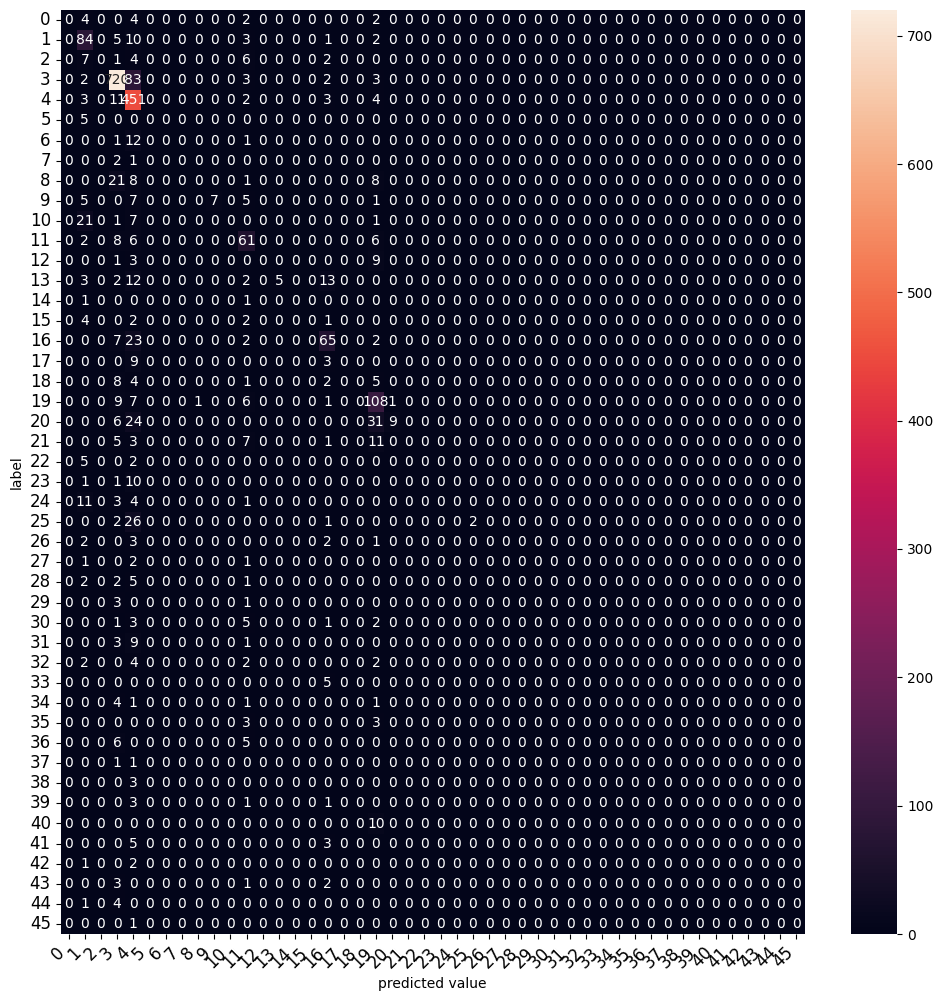

In [33]:
graph_confusion_matrix(model_2, tfidfv_2_test, y_test_2)

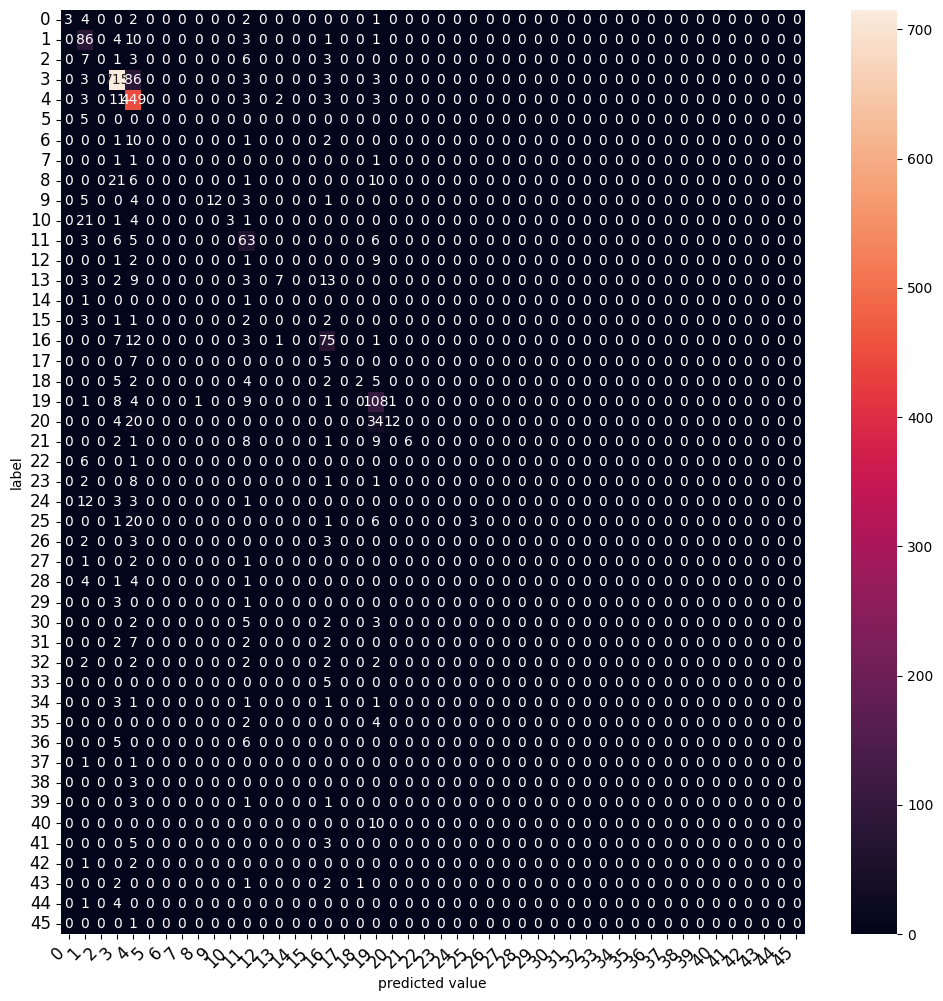

In [34]:
graph_confusion_matrix(model_3, tfidfv_3_test, y_test_3)

2. Complement Naive Bayes Classifier

In [35]:
cb1 = ComplementNB()
cb1.fit(tfidfv_1, y_train_1)
cb2 = ComplementNB()
cb2.fit(tfidfv_2, y_train_2)
cb3 = ComplementNB()
cb3.fit(tfidfv_3, y_train_3)

ComplementNB()

In [36]:
predicted = cb1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = cb2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = cb3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.7649154051647373
2번 정확도: 0.7707034728406055
3번 정확도: 0.7644701691896705


In [37]:
print(classification_report(y_test_1, cb1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, cb2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, cb3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
          17       0.00    

3. Logistic Regression

In [38]:
lr1 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr1.fit(tfidfv_1, y_train_1)
lr2 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr2.fit(tfidfv_2, y_train_2)
lr3 = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr3.fit(tfidfv_3, y_train_3)

LogisticRegression(C=10000, max_iter=3000)

In [39]:
predicted = lr1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = lr2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = lr3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.811219946571683
2번 정확도: 0.8058771148708815
3번 정확도: 0.792520035618878


In [40]:
print(classification_report(y_test_1, lr1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, lr2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, lr3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.73      0.80      0.76        20
           3       0.92      0.93      0.93       813
           4       0.81      0.88      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.70      0.74      0.72        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.68      0.73      0.71        83
          12       0.57      0.31      0.40        13
          13       0.60      0.65      0.62        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.71      0.76      0.74        99
          17       0.73    

4. Linear Support Vector Machine

In [41]:
lsvc1 = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc1.fit(tfidfv_1, y_train_1)
lsvc2 = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc2.fit(tfidfv_2, y_train_2)
lsvc3 = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc3.fit(tfidfv_3, y_train_3)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [42]:
predicted = lsvc1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = lsvc2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = lsvc3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.7876224398931434
2번 정확도: 0.776046304541407
3번 정확도: 0.7560106856634016


In [43]:
print(classification_report(y_test_1, lsvc1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, lsvc2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, lsvc3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.73      0.76      0.74       105
           2       0.65      0.65      0.65        20
           3       0.91      0.92      0.91       813
           4       0.81      0.85      0.83       474
           5       0.33      0.20      0.25         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.64      0.71      0.68        38
           9       0.74      0.80      0.77        25
          10       0.85      0.77      0.81        30
          11       0.65      0.70      0.67        83
          12       0.42      0.38      0.40        13
          13       0.57      0.57      0.57        37
          14       1.00      0.50      0.67         2
          15       0.43      0.33      0.38         9
          16       0.67      0.74      0.70        99
          17       0.80    

5. Decision Tree

In [44]:
tree1 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree1.fit(tfidfv_1, y_train_1)
tree2 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree2.fit(tfidfv_2, y_train_2)
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(tfidfv_3, y_train_3)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [45]:
predicted = tree1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = tree2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = tree3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.6211041852181657
2번 정확도: 0.6179875333926982
3번 정확도: 0.6260017809439002


In [46]:
print(classification_report(y_test_1, tree1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, tree2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, tree3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.43      0.53       105
           2       0.75      0.45      0.56        20
           3       0.94      0.85      0.89       813
           4       0.40      0.89      0.55       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.89      0.80      0.84        30
          11       0.58      0.60      0.59        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.83      0.70        99
          17       0.00    

6. Random Forest

In [47]:
forest1 = RandomForestClassifier(n_estimators=5, random_state=0)
forest1.fit(tfidfv_1, y_train_1)
forest2 = RandomForestClassifier(n_estimators=5, random_state=0)
forest2.fit(tfidfv_2, y_train_2)
forest3 = RandomForestClassifier(n_estimators=5, random_state=0)
forest3.fit(tfidfv_3, y_train_3)

RandomForestClassifier(n_estimators=5, random_state=0)

In [48]:
predicted = forest1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = forest2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = forest3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.6544968833481746
2번 정확도: 0.701246660730187
3번 정확도: 0.6856634016028496


In [49]:
print(classification_report(y_test_1, forest1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, forest2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, forest3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.46      0.52        99
          17       0.00    

7. Gradient Boosting Classifier

In [50]:
grbt1 = GradientBoostingClassifier(random_state=0)  # verbose=3
grbt1.fit(tfidfv_1, y_train_1)
grbt2 = GradientBoostingClassifier(random_state=0)  # verbose=3
grbt2.fit(tfidfv_2, y_train_2)
grbt3 = GradientBoostingClassifier(random_state=0)  # verbose=3
grbt3.fit(tfidfv_3, y_train_3)

GradientBoostingClassifier(random_state=0)

In [51]:
predicted = grbt1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = grbt2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = grbt3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.7680320569902048
2번 정확도: 0.7666963490650045
3번 정확도: 0.7715939447907391


In [52]:
print(classification_report(y_test_1, grbt1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, grbt2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, grbt3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.81      0.72      0.76       105
           2       0.58      0.70      0.64        20
           3       0.88      0.91      0.89       813
           4       0.77      0.85      0.81       474
           5       1.00      0.20      0.33         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.62      0.63      0.62        38
           9       0.91      0.80      0.85        25
          10       0.79      0.77      0.78        30
          11       0.63      0.65      0.64        83
          12       0.50      0.46      0.48        13
          13       0.56      0.38      0.45        37
          14       0.00      0.00      0.00         2
          15       0.17      0.11      0.13         9
          16       0.71      0.70      0.70        99
          17       0.71    

8. Voting

In [53]:
voting_classifier1 = VotingClassifier(
    estimators=[
        ('logistic', lr1),
        ('complement_nb', cb1),
        ('gradient_boosting', grbt1)
    ],
    voting='soft'
)
voting_classifier2 = VotingClassifier(
    estimators=[
        ('logistic', lr2),
        ('complement_nb', cb2),
        ('gradient_boosting', grbt2)
    ],
    voting='soft'
)
voting_classifier3 = VotingClassifier(
    estimators=[
        ('logistic', lr3),
        ('complement_nb', cb3),
        ('gradient_boosting', grbt3)
    ],
    voting='soft'
)
voting_classifier1.fit(tfidfv_1, y_train_1)
voting_classifier2.fit(tfidfv_2, y_train_2)
voting_classifier3.fit(tfidfv_3, y_train_3)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10000, max_iter=3000)),
                             ('complement_nb', ComplementNB()),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [54]:
predicted = voting_classifier1.predict(tfidfv_1_test)  # 테스트 데이터에 대한 예측
print("1번 정확도:", accuracy_score(y_test_1, predicted))  # 예측값과 실제값 비교
predicted = voting_classifier2.predict(tfidfv_2_test)  # 테스트 데이터에 대한 예측
print("2번 정확도:", accuracy_score(y_test_2, predicted))  # 예측값과 실제값 비교
predicted = voting_classifier3.predict(tfidfv_3_test)  # 테스트 데이터에 대한 예측
print("3번 정확도:", accuracy_score(y_test_3, predicted))  # 예측값과 실제값 비교

1번 정확도: 0.8161175422974176
2번 정확도: 0.8156723063223509
3번 정확도: 0.8058771148708815


In [55]:
print(classification_report(y_test_1, voting_classifier1.predict(tfidfv_1_test), zero_division=0))
print(classification_report(y_test_2, voting_classifier2.predict(tfidfv_2_test), zero_division=0))
print(classification_report(y_test_3, voting_classifier3.predict(tfidfv_3_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.79      0.74      0.76       105
           2       0.65      0.75      0.70        20
           3       0.92      0.94      0.93       813
           4       0.82      0.89      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.65      0.67      0.66        83
          12       0.55      0.46      0.50        13
          13       0.67      0.65      0.66        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.74      0.76      0.75        99
          17       0.78    

딥러닝 모델과의 비교

In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

(x_train_1, y_train_1), (x_test_1, y_test_1) = reuters.load_data(
    num_words=None, test_split=0.2)
(x_train_2, y_train_2), (x_test_2, y_test_2) = reuters.load_data(
    num_words=5000, test_split=0.2)
(x_train_3, y_train_3), (x_test_3, y_test_3) = reuters.load_data(
    num_words=3000, test_split=0.2)


# 시퀀스 패딩
max_len = 100  # 최대 길이 설정
x_train_1_padded = pad_sequences(x_train_1, maxlen=max_len, padding='post')
x_test_1_padded = pad_sequences(x_test_1, maxlen=max_len, padding='post')

# 레이블을 one-hot encoding
num_classes = max(y_train_1) + 1
y_train_1_onehot = to_categorical(y_train_1, num_classes=num_classes)
y_test_1_onehot = to_categorical(y_test_1, num_classes=num_classes)

# RNN 모델 정의
model1 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 다중 클래스 분류
])

# 모델 컴파일
model1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model1.fit(x_train_1_padded, y_train_1_onehot, epochs=30,
          batch_size=32, validation_split=0.2)

Epoch 1/30
225/225 [==============================] - 8s 30ms/step - loss: 2.4778 - accuracy: 0.3674 - val_loss: 2.0969 - val_accuracy: 0.4508
Epoch 2/30
225/225 [==============================] - 3s 14ms/step - loss: 2.3063 - accuracy: 0.3511 - val_loss: 2.3523 - val_accuracy: 0.3450
Epoch 3/30
225/225 [==============================] - 2s 8ms/step - loss: 2.2195 - accuracy: 0.3648 - val_loss: 2.1232 - val_accuracy: 0.3951
Epoch 4/30
225/225 [==============================] - 2s 8ms/step - loss: 2.0010 - accuracy: 0.4380 - val_loss: 1.7874 - val_accuracy: 0.5309
Epoch 5/30
225/225 [==============================] - 1s 5ms/step - loss: 1.8736 - accuracy: 0.5115 - val_loss: 1.7764 - val_accuracy: 0.5253
Epoch 6/30
225/225 [==============================] - 1s 5ms/step - loss: 1.7234 - accuracy: 0.5589 - val_loss: 1.8275 - val_accuracy: 0.5298
Epoch 7/30
225/225 [==============================] - 1s 5ms/step - loss: 1.6452 - accuracy: 0.5756 - val_loss: 1.6821 - val_accuracy: 0.5582
Epoc

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 시퀀스 패딩
max_len = 100  # 최대 길이 설정
x_train_2_padded = pad_sequences(x_train_2, maxlen=max_len, padding='post')
x_test_2_padded = pad_sequences(x_test_2, maxlen=max_len, padding='post')

# 레이블을 one-hot encoding
num_classes = max(y_train_2) + 1
y_train_2_onehot = to_categorical(y_train_2, num_classes=num_classes)
y_test_2_onehot = to_categorical(y_test_2, num_classes=num_classes)

# RNN 모델 정의
model2 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 다중 클래스 분류
])

# 모델 컴파일
model2.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

# 모델 학습
model2.fit(x_train_2_padded, y_train_2_onehot, epochs=30,
           batch_size=32, validation_split=0.2)

Epoch 1/30
225/225 [==============================] - 7s 26ms/step - loss: 2.4101 - accuracy: 0.3434 - val_loss: 2.2766 - val_accuracy: 0.3517
Epoch 2/30
225/225 [==============================] - 3s 13ms/step - loss: 2.2902 - accuracy: 0.3662 - val_loss: 2.1430 - val_accuracy: 0.3951
Epoch 3/30
225/225 [==============================] - 1s 6ms/step - loss: 2.2097 - accuracy: 0.3788 - val_loss: 2.1020 - val_accuracy: 0.3984
Epoch 4/30
225/225 [==============================] - 1s 5ms/step - loss: 2.1317 - accuracy: 0.3887 - val_loss: 2.1875 - val_accuracy: 0.3812
Epoch 5/30
225/225 [==============================] - 1s 5ms/step - loss: 2.1998 - accuracy: 0.3740 - val_loss: 2.1630 - val_accuracy: 0.3489
Epoch 6/30
225/225 [==============================] - 1s 5ms/step - loss: 2.2194 - accuracy: 0.3635 - val_loss: 2.1116 - val_accuracy: 0.4257
Epoch 7/30
225/225 [==============================] - 1s 4ms/step - loss: 2.2692 - accuracy: 0.3627 - val_loss: 2.3167 - val_accuracy: 0.3684
Epoc

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 시퀀스 패딩
max_len = 100  # 최대 길이 설정
x_train_3_padded = pad_sequences(x_train_3, maxlen=max_len, padding='post')
x_test_3_padded = pad_sequences(x_test_3, maxlen=max_len, padding='post')

# 레이블을 one-hot encoding
num_classes = max(y_train_3) + 1
y_train_3_onehot = to_categorical(y_train_3, num_classes=num_classes)
y_test_3_onehot = to_categorical(y_test_3, num_classes=num_classes)


# RNN 모델 정의
model3 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 다중 클래스 분류
])

# 모델 컴파일
model3.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

# 모델 학습
model3.fit(x_train_3_padded, y_train_3_onehot, epochs=30,
           batch_size=32, validation_split=0.2)

Epoch 1/30
225/225 [==============================] - 7s 28ms/step - loss: 2.5394 - accuracy: 0.3435 - val_loss: 2.2357 - val_accuracy: 0.3617
Epoch 2/30
225/225 [==============================] - 2s 9ms/step - loss: 2.2483 - accuracy: 0.3562 - val_loss: 1.9945 - val_accuracy: 0.4023
Epoch 3/30
225/225 [==============================] - 2s 7ms/step - loss: 1.9819 - accuracy: 0.4099 - val_loss: 1.8949 - val_accuracy: 0.4252
Epoch 4/30
225/225 [==============================] - 1s 6ms/step - loss: 1.9437 - accuracy: 0.4175 - val_loss: 1.9195 - val_accuracy: 0.4151
Epoch 5/30
225/225 [==============================] - 1s 5ms/step - loss: 1.9209 - accuracy: 0.4178 - val_loss: 1.9337 - val_accuracy: 0.4185
Epoch 6/30
225/225 [==============================] - 1s 5ms/step - loss: 1.8896 - accuracy: 0.4392 - val_loss: 1.9093 - val_accuracy: 0.4307
Epoch 7/30
225/225 [==============================] - 1s 4ms/step - loss: 1.8000 - accuracy: 0.4628 - val_loss: 1.7634 - val_accuracy: 0.4886
Epoch

In [66]:
# 평가
loss1, accuracy1 = model1.evaluate(x_test_1_padded, y_test_1_onehot, batch_size=32)
print(f"1번 정확도: {accuracy1}")
# 평가
loss2, accuracy2 = model2.evaluate(x_test_2_padded, y_test_2_onehot, batch_size=32)
print(f"2번 정확도: {accuracy2}")
# 평가
loss3, accuracy3 = model3.evaluate(x_test_3_padded, y_test_3_onehot, batch_size=32)
print(f"3번 정확도: {accuracy3}")

71/71 [==============================] - 0s 1ms/step - loss: 2.3844 - accuracy: 0.5926
1번 정확도: 0.5926091074943542
71/71 [==============================] - 0s 1ms/step - loss: 2.1272 - accuracy: 0.5708
2번 정확도: 0.5707924962043762
71/71 [==============================] - 0s 2ms/step - loss: 2.0049 - accuracy: 0.6425
3번 정확도: 0.6424754858016968


딥러닝 모델의 성능이 많이 낮은데,, 모델이 너무 간단해서 성능이 그닥 좋게 나온 것 같지 않다.    
앞으로 배울 Transformer를 사용하면 얼마나 성능향상이 있을 지 기대가 됩니다.